### **1. Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### **2. Load and Preprocess Data**

In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


### **3. Define CNN Architecture**

In [3]:
def create_model():
  model = models.Sequential([
      # Convolutional layers
      layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(64, (3, 3), activation='relu'),
      # Fully connected layers
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense(10) # 10 output classes
      ])
  model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  return model

### **4. Train the model**

In [4]:
epoch_values = [5, 10, 20, 50]
histories = {}

# Train for each epoch value
for num_epochs in epoch_values:
    print(f"\nTraining model for {num_epochs} epochs from scratch...")
    model = create_model()
    history = model.fit(train_images, train_labels,
                        epochs=num_epochs,
                        validation_data=(test_images, test_labels),
                        verbose=2)
    histories[num_epochs] = history


Training model for 5 epochs from scratch...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 - 14s - 9ms/step - accuracy: 0.4493 - loss: 1.5084 - val_accuracy: 0.5550 - val_loss: 1.2395
Epoch 2/5
1563/1563 - 14s - 9ms/step - accuracy: 0.5908 - loss: 1.1477 - val_accuracy: 0.6158 - val_loss: 1.0708
Epoch 3/5
1563/1563 - 7s - 4ms/step - accuracy: 0.6485 - loss: 1.0043 - val_accuracy: 0.6577 - val_loss: 0.9885
Epoch 4/5
1563/1563 - 6s - 4ms/step - accuracy: 0.6824 - loss: 0.9062 - val_accuracy: 0.6543 - val_loss: 1.0006
Epoch 5/5
1563/1563 - 7s - 4ms/step - accuracy: 0.7087 - loss: 0.8327 - val_accuracy: 0.6843 - val_loss: 0.9113

Training model for 10 epochs from scratch...
Epoch 1/10
1563/1563 - 11s - 7ms/step - accuracy: 0.4463 - loss: 1.5213 - val_accuracy: 0.5620 - val_loss: 1.2351
Epoch 2/10
1563/1563 - 7s - 5ms/step - accuracy: 0.5977 - loss: 1.1403 - val_accuracy: 0.6239 - val_loss: 1.0607
Epoch 3/10
1563/1563 - 10s - 6ms/step - accuracy: 0.6566 - loss: 0.9823 - val_accuracy: 0.6345 - val_loss: 1.0295
Epoch 4/10
1563/1563 - 10s - 6ms/step - accuracy: 0

### **5. Model Evaluation**

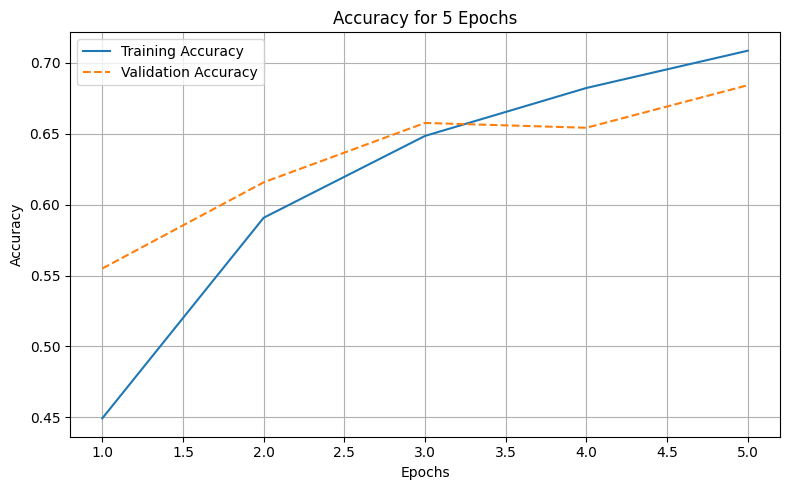

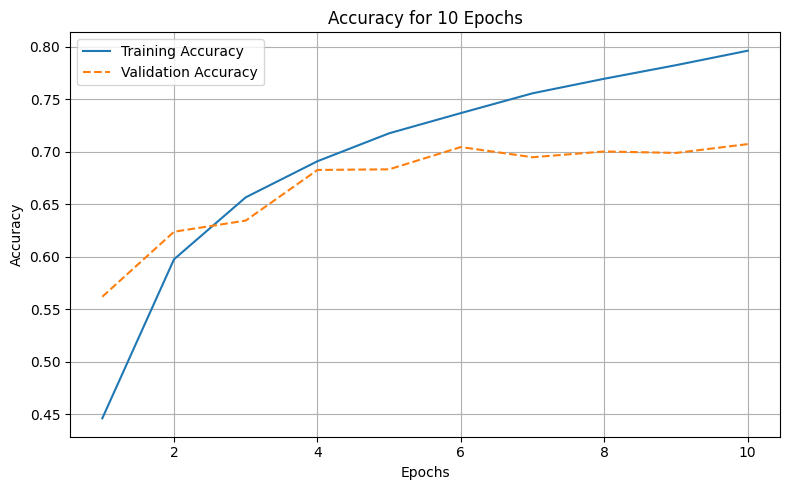

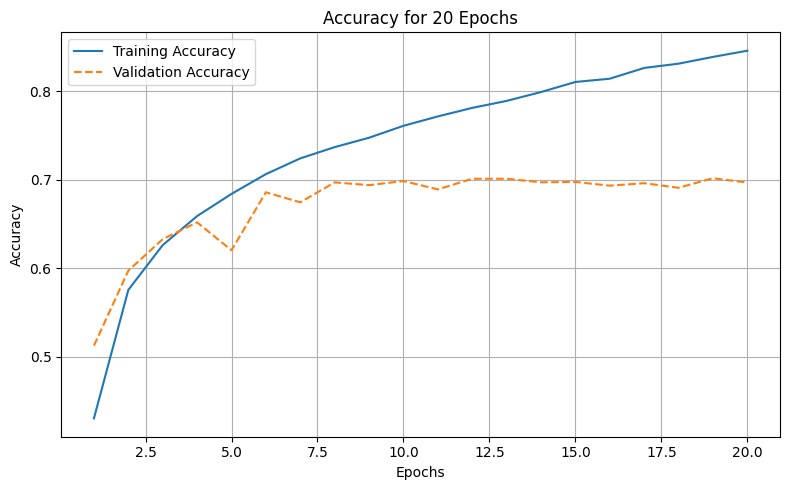

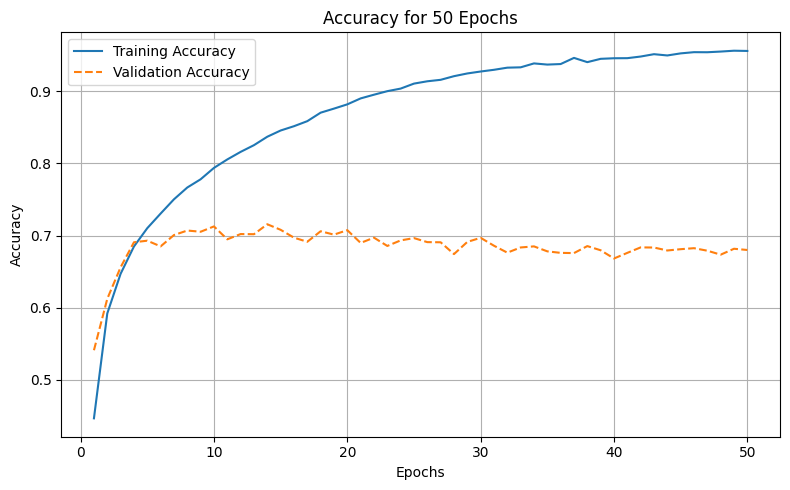

In [6]:
for num_epochs in epoch_values:
    history = histories[num_epochs]
    epochs_range = range(1, num_epochs + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')

    plt.title(f'Accuracy for {num_epochs} Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### **6. Model predictions before and after training**

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step
Epoch 1/10
1563/1563 - 11s - 7ms/step - accuracy: 0.4372 - loss: 1.5452 - val_accuracy: 0.5282 - val_loss: 1.3032
Epoch 2/10
1563/1563 - 7s - 4ms/step - accuracy: 0.5850 - loss: 1.1750 - val_accuracy: 0.6004 - val_loss: 1.1556
Epoch 3/10
1563/1563 - 10s - 6ms/step - accuracy: 0.6409 - loss: 1.0195 - val_accuracy: 0.6320 - val_loss: 1.0565
Epoch 4/10
1563/1563 - 6s - 4ms/step - accuracy: 0.6786 - loss: 0.9134 - val_accuracy: 0.6675 - val_loss: 0.9562
Epoch 5/10
1563/1563 - 6s - 4ms/step - accuracy: 0.7066 - loss: 0.8373 - val_accuracy: 0.6755 - val_loss: 0.9376
Epoch 6/10
1563/1563 - 10s - 6ms/step - accuracy: 0.7292 - loss: 0.7725 - val_accuracy: 0.6810 - val_loss: 0.9362
Epoch 7/10
1563/1563 - 6s - 4ms/step - accuracy: 0.7437 - loss: 0.7285 - val_accuracy: 0.6912 - val_loss: 0.9171
Epoch 8/10
1563/1563 - 6s - 4ms/step - accuracy: 0.7634 - loss: 0.6764 - val_accuracy: 0.6953 - val_loss: 0.9126
Epoch 9/10
1563/1563 - 10s - 6ms/step - accuracy: 0.77

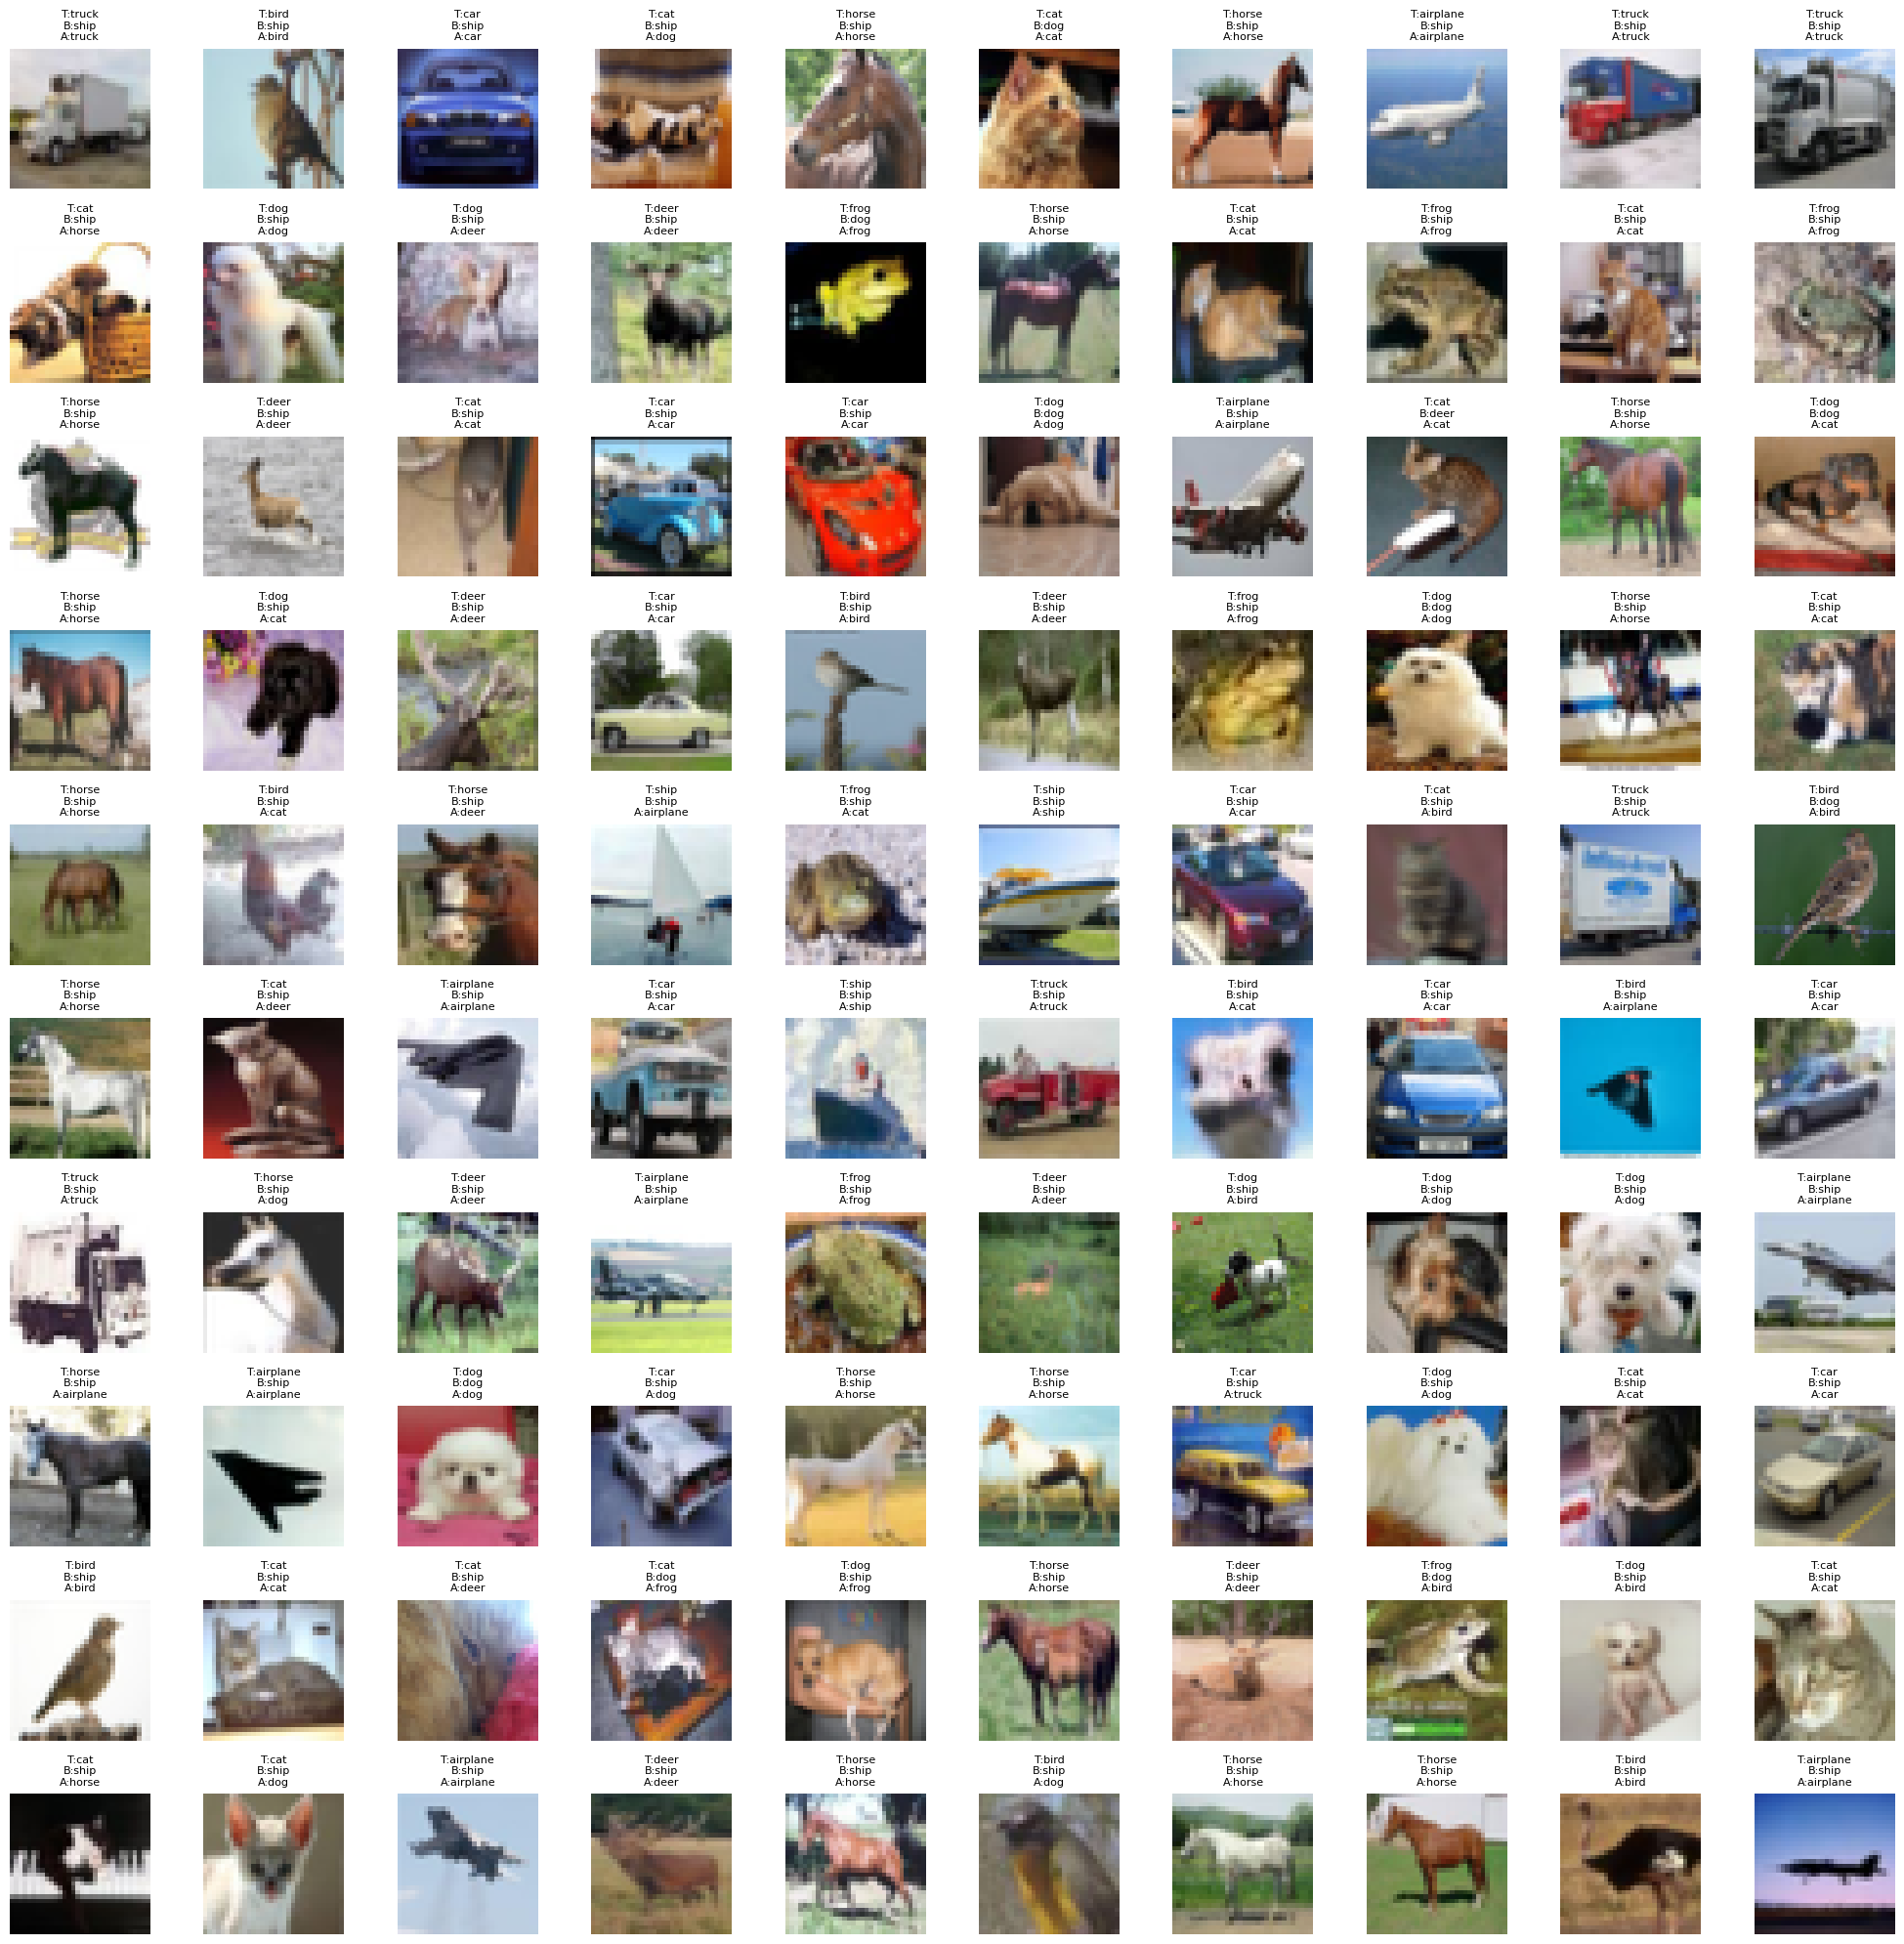

In [8]:
import numpy as np
import random

test_labels = test_labels.flatten()
class_names = ['airplane','car','bird','cat','deer','dog','frog','horse','ship','truck']

# Selecting 100 random test images
random.seed(42)  # for reproducibility
indices = random.sample(range(len(test_images)), 100)
sample_images = test_images[indices]
sample_labels = test_labels[indices]

# Make predictions BEFORE training
model = create_model()
logits_before = model.predict(sample_images)
preds_before = np.argmax(logits_before, axis=1)


# Train the model for optimal number of epochs (10)
model = create_model()  # fresh model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2)

# Make predictions AFTER training
logits_after = model.predict(sample_images)
preds_after = np.argmax(logits_after, axis=1)

# Plot the 100 images with actual, before, and after predictions
plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')
    actual = class_names[sample_labels[i]]
    before = class_names[preds_before[i]]
    after = class_names[preds_after[i]]
    plt.title(f"T:{actual}\nB:{before}\nA:{after}", fontsize=8)

plt.tight_layout()
plt.show()